## Load data

Here are the package required in this project, the pip command are listed for anyone who wants to run the code.

In [1]:
# ! pip install mlxtend

In [2]:
import pandas as pd
import numpy as np

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the training dataset
train = pd.read_csv('basket_data_by_date_train.csv')
train.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850,20.34
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850,25.50
2,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850,15.30
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850,20.34
4,536365,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850,15.30


In [4]:
# Check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      40000 non-null  int64  
 1   Itemname    40000 non-null  object 
 2   Quantity    40000 non-null  int64  
 3   Date        40000 non-null  object 
 4   Price       40000 non-null  float64
 5   CustomerID  40000 non-null  int64  
 6   cost        40000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.1+ MB


In [5]:
# Check the missing value
train.isna().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
cost          0
dtype: int64

In [6]:
# Check data description
train.describe(include="all")

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
count,40000.000000,40000,40000.000000,40000,40000.000000,40000.000000,40000.000000
unique,NaN,2523,NaN,2403,NaN,NaN,NaN
top,NaN,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2/02/2011 17:06,NaN,NaN,NaN
freq,NaN,278,NaN,244,NaN,NaN,NaN
mean,540254.879225,NaN,3.487700,NaN,3.732165,15577.606525,11.097411
std,2380.444952,NaN,2.611766,NaN,5.711630,1730.347123,13.298301
min,536365.000000,NaN,1.000000,NaN,0.100000,12347.000000,0.140000
25%,538093.000000,NaN,1.000000,NaN,1.650000,14224.000000,3.300000
50%,540373.000000,NaN,2.000000,NaN,2.950000,15570.000000,7.950000
75%,542360.000000,NaN,6.000000,NaN,4.650000,17220.000000,15.800000


After loading the data and checking the basic information, there's no missing data so we needn't apply any operation to deal with it. Hence, **no imputation of missing values need to be done**

## Exploratory Data Analysis

In [7]:
# Change the data format
train['Date'] = pd.to_datetime(train['Date'], format="%d/%m/%Y %H:%M")
train.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,20.34
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,25.50
2,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,15.30
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,20.34
4,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,15.30


In [8]:
# Check total number of item sold(by count) and total days
total_items = len(train)
total_days = len(np.unique(train.Date.dt.day))

# Check how many unique items are sold (by count) and average sold by day
average_items = round(total_items / total_days, 2)
unique_items = train.Itemname.unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days ".format(total_items, total_days))
print("With an average of {} items sold daily".format(average_items))

There are 2523 unique items sold 
Total 40000 items sold in 30 days 
With an average of 1333.33 items sold daily


In [9]:
# Check number of unique bills, customers, and items
print('Number of bills: %d\nNumber of customers: %d\nNumber of items: %d' % (len(train['BillNo'].unique()),
                                                                           len(train['CustomerID'].unique()),
                                                                           len(train['Itemname'].unique())))

Number of bills: 2524
Number of customers: 1391
Number of items: 2523


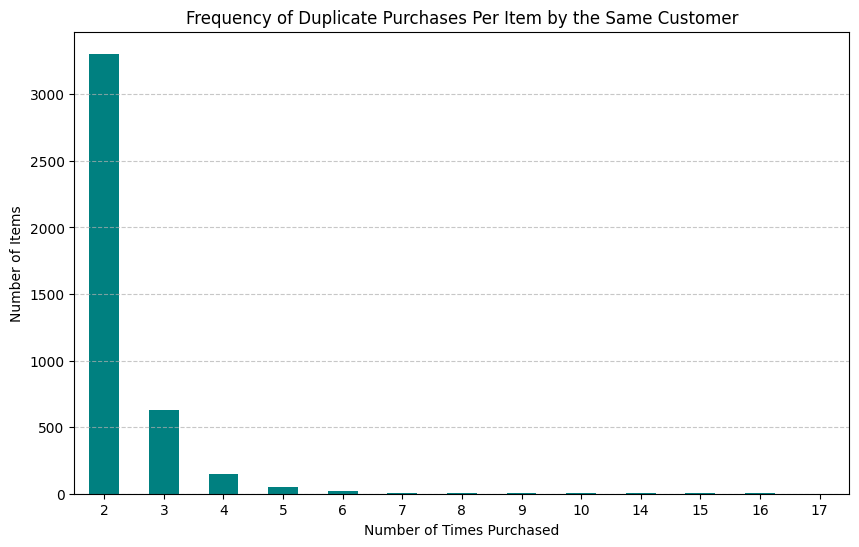

In [10]:
import matplotlib.pyplot as plt

# Group by 'CustomerID' and 'Itemname' and count occurrences
duplicate_rows = train.groupby(['CustomerID', 'Itemname']).size().reset_index(name='count')

# Filter rows where count is greater than 1 (indicating duplicates)
duplicate_rows = duplicate_rows[duplicate_rows['count'] > 1]

# Aggregate data to count how many times each 'count' value appears
duplicate_distribution = duplicate_rows['count'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
duplicate_distribution.plot(kind='bar', color='teal')
plt.title('Frequency of Duplicate Purchases Per Item by the Same Customer')
plt.xlabel('Number of Times Purchased')
plt.ylabel('Number of Items')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

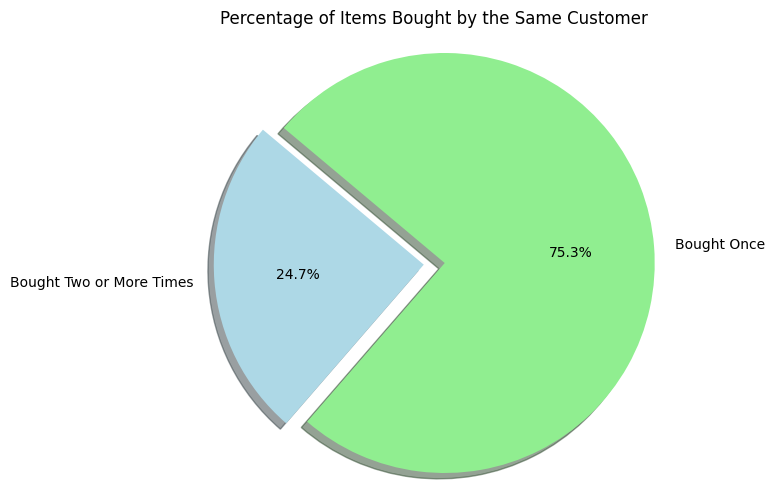

In [11]:
# Calculate the total count of duplicate purchases
total_duplicate_count = duplicate_rows['count'].sum()

# Calculate the total number of rows in the dataset
total_rows = len(train)

# Calculate the percentage of items bought by the same customer two or more times/only once
percentage_duplicates = (total_duplicate_count / total_rows) * 100
percentage_single = 100 - percentage_duplicates

# Plot the percentages
labels = ['Bought Two or More Times', 'Bought Once']
sizes = [percentage_duplicates, percentage_single]
colors = ['lightblue', 'lightgreen']
explode = (0, 0.1)  # explode the second slice (i.e., items bought two or more times)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Items Bought by the Same Customer')
plt.axis('equal')
plt.show()


Based on the above `duplicate rows`, we can find that user may buy same item multiple times, so it's important to group the item by quantity when needed.

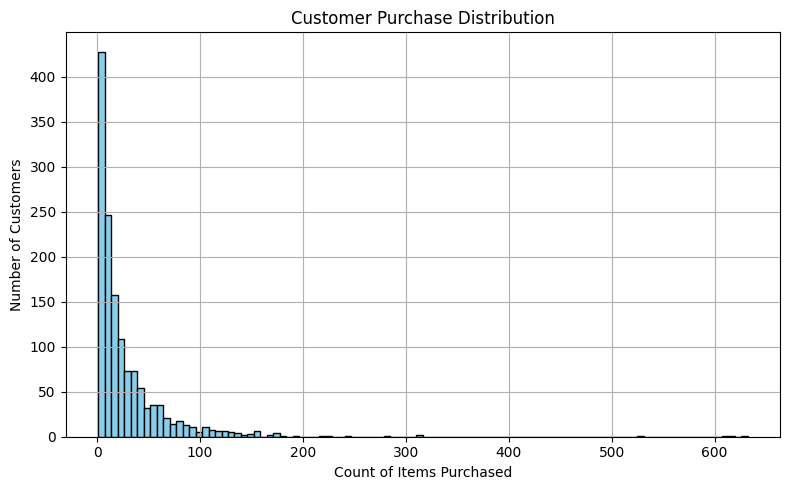

In [12]:
import matplotlib.pyplot as plt

# See how many items for each user bought in total
user_info = train.groupby('CustomerID').size()

plt.figure(figsize=(8, 5))
user_info.plot(kind='hist', bins=100, color='skyblue', edgecolor='black')
plt.title('Customer Purchase Distribution')
plt.xlabel('Count of Items Purchased')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


Customer Purchase Distribution

- The majority of customers make occasional purchases, while only a few engage in frequent shopping. 
- A small group of customers accounts for a significant portion of the total transactions.

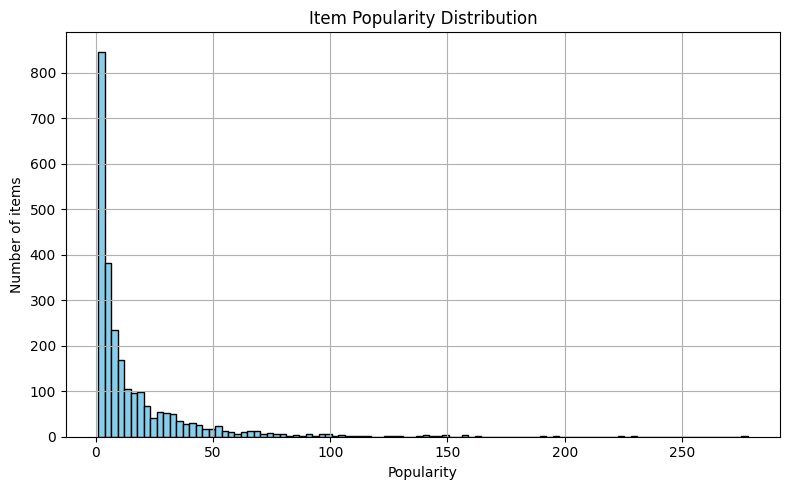

In [13]:
# See how many times the same item is bought
item_popularity = train.groupby('Itemname').size()

plt.figure(figsize=(8, 5))
plt.hist(item_popularity, bins=100, color='skyblue', edgecolor='black')
plt.title('Item Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Number of items')
plt.grid(True)
plt.tight_layout()
plt.show()

Item Popularity Distribution

- Few items sold frequently.
- Majority purchased infrequently.

<Axes: title={'center': 'Top 20 Most Purchased Items by Customers'}, xlabel='Number of count', ylabel='Item Name'>

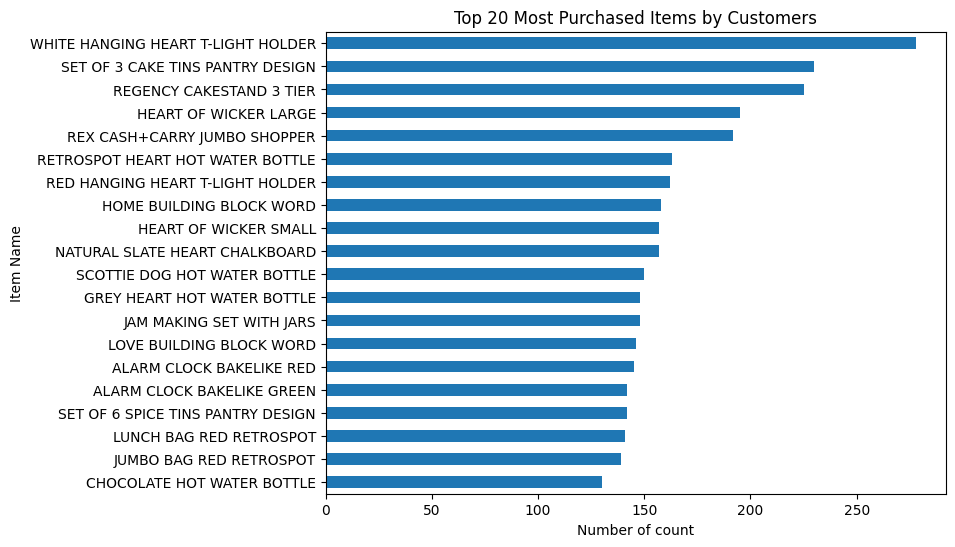

In [14]:
# plot top 10 sold items by item appreance frenqucy
top_items_by_count = train['Itemname'].value_counts()[:20]
top_items_by_count.iloc[::-1].plot(figsize=(8,6), kind="barh", title="Top 20 Most Purchased Items by Customers",
					 ylabel="Item Name", xlabel="Number of count")


<Axes: title={'center': 'Top 20 items bought the most by quantity'}, xlabel='Number of quantity sold', ylabel='Item Name'>

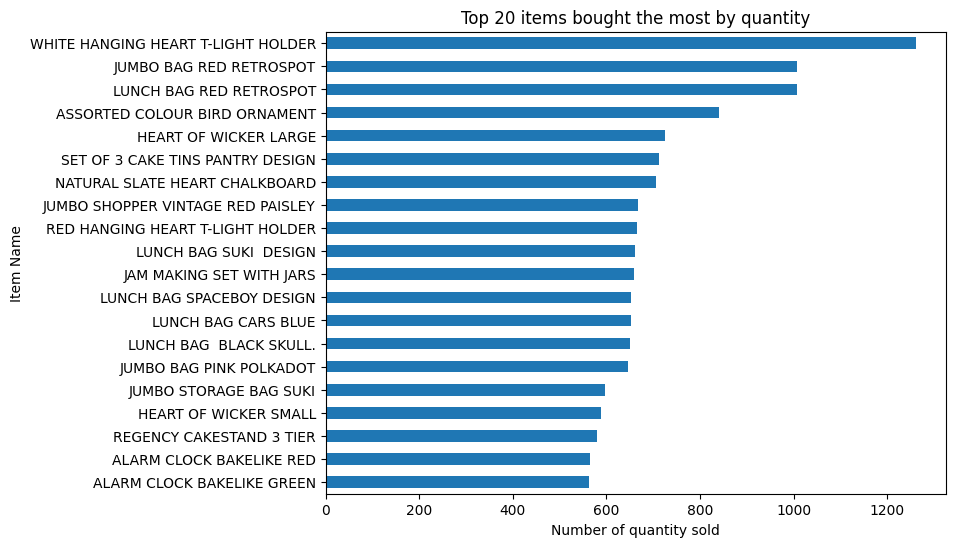

In [15]:
# plot top 20 sold items by total quantity
top_item_by_quantity = train.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:20]
top_item_by_quantity.iloc[::-1].plot(figsize=(8,6), kind="barh", title="Top 20 items bought the most by quantity", ylabel="Item Name", xlabel="Number of quantity sold")


Collaborative Filtering Considerations:
- Cold Start Problem:  We can still recommend products to new users by finding items similar to those purchased by top customers.

- Matrix Sparsity:  To address sparsity in the user-item interaction matrix, we can focus on denser areas that reflect frequent purchases.

- Popularity Bias:  We can avoid recommending only popular items by suggesting lesser-known products similar to top-selling ones, creating a balance against popularity bias.

In [16]:
# See the avrage items appeared in one bill
average_items_per_bill = round(train.groupby('CustomerID')['Itemname'].count().mean(), 4)
print("Average number of items bought per customer:", average_items_per_bill)

Average number of items bought per customer: 28.7563


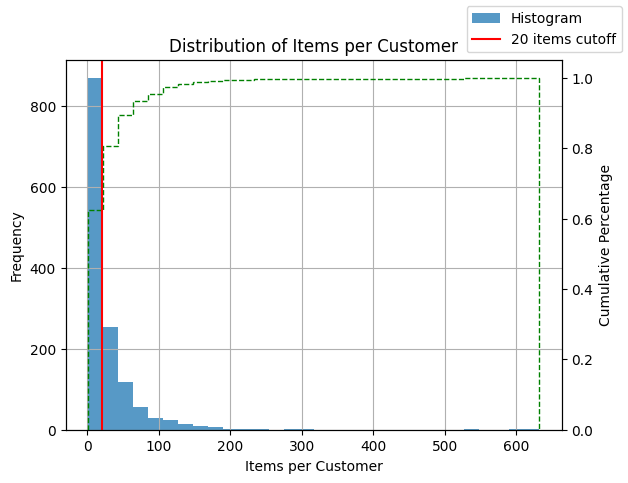

In [17]:
# Calculate the number of items per bill for each customer
items_per_bill = train.groupby('CustomerID')['Itemname'].count()

# Create a histogram and cumulative distribution of these values
fig, ax1 = plt.subplots()

# Histogram of items per bill
ax1.hist(items_per_bill, bins=30, alpha=0.75, label='Histogram')
ax1.set_xlabel('Items per Customer')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Items per Customer')

# Adding a secondary axis for cumulative percentage
ax2 = ax1.twinx()
ax2.hist(items_per_bill, bins=30, cumulative=True, histtype='step', color='green', linestyle='--', density=True)
ax2.set_ylabel('Cumulative Percentage')
ax2.axvline(x=20, color='red', linestyle='-', label='20 items cutoff')

ax1.grid(True)
fig.legend(loc='upper right')
plt.show()

Histogram (Blue Bars): The histogram shows the distribution of the number of items purchased per customer. The number of customers decreases significantly as the number of items increases, indicating that most customers purchase a relatively small number of items, and very few customers purchase a large number.

Cumulative Percentage (Red Dotted Line): The red dotted line represents the cumulative percentage of customers. It starts at the bottom left, indicating that a small percentage of customers have bought only a few items. As we move to the right (towards higher item counts), the line increases rapidly, suggesting that adding a few more items quickly includes a larger percentage of customers. Once the line reaches close to the top of the graph, it starts to level off, indicating that almost all customers are accounted for. The leveling off of the curve suggests that there are very few customers who buy many more items than the average.

20 Items Cutoff (Green Dashed Line): The vertical green dashed line indicates the point of 20 items per customer. The intersection of this green line with the cumulative percentage line appears to be at nearly 100%, meaning that almost all customers buy 20 or fewer items. This suggests that if a store were to recommend 20 items, it would potentially meet the needs of nearly all of its customers.


In [18]:
# Creating a user-item interaction matrix, entries will be 1 where a purchase is made, 0 otherwise
utility_matrix = pd.pivot_table(train, index='CustomerID', columns='Itemname', aggfunc=len, fill_value=0)

# Calculate the density of the user-item interaction matrix
matrix_size = np.prod(utility_matrix.shape)
num_purchases = utility_matrix.astype(bool).sum().sum() 
density = num_purchases / matrix_size
print(f'Matrix Density: {density:.4f}')

Matrix Density: 0.0098


In [19]:
# which items have the strongest correlations in terms of how frequently they are purchased together by the same customers

# Create the User - Item matrix
user_item_matrix = pd.pivot_table(train, values='Quantity', index='CustomerID', columns='Itemname', aggfunc='sum', fill_value=0)

# Compute pairwise correlation of columns
item_correlations = user_item_matrix.corr()

# Create a mask to ignore self-correlation 
mask = np.triu(np.ones_like(item_correlations, dtype=bool))

# Apply the mask to get the upper triangle 
upper = item_correlations.where(mask)

# Find the top pairs excluding diagonal 
strongest_pairs = upper.stack().nlargest(10) 
print(strongest_pairs)

Itemname                        Itemname                       
BLOSSOM IMAGES GIFT WRAP SET    GIRLY PINK TOOL SET                1.0
                                YELLOW BREAKFAST CUP AND SAUCER    1.0
BLUE & WHITE BREAKFAST TRAY     GIRLY PINK TOOL SET                1.0
                                YELLOW BREAKFAST CUP AND SAUCER    1.0
BLUE FLOCK CUSHION COVER        GIRLY PINK TOOL SET                1.0
                                YELLOW BREAKFAST CUP AND SAUCER    1.0
GIRLY PINK TOOL SET             IVORY STRING CURTAIN WITH POLE     1.0
                                VINTAGE NOTEBOOK BEAUTY GIRL       1.0
IVORY STRING CURTAIN WITH POLE  YELLOW BREAKFAST CUP AND SAUCER    1.0
VINTAGE NOTEBOOK BEAUTY GIRL    YELLOW BREAKFAST CUP AND SAUCER    1.0
dtype: float64


In [20]:
corr_df = pd.DataFrame(strongest_pairs)
corr_df

0
Itemname                       Itemname                            
BLOSSOM IMAGES GIFT WRAP SET   GIRLY PINK TOOL SET              1.0
                               YELLOW BREAKFAST CUP AND SAUCER  1.0
BLUE & WHITE BREAKFAST TRAY    GIRLY PINK TOOL SET              1.0
                               YELLOW BREAKFAST CUP AND SAUCER  1.0
BLUE FLOCK CUSHION COVER       GIRLY PINK TOOL SET              1.0
                               YELLOW BREAKFAST CUP AND SAUCER  1.0
GIRLY PINK TOOL SET            IVORY STRING CURTAIN WITH POLE   1.0
                               VINTAGE NOTEBOOK BEAUTY GIRL     1.0
IVORY STRING CURTAIN WITH POLE YELLOW BREAKFAST CUP AND SAUCER  1.0
VINTAGE NOTEBOOK BEAUTY GIRL   YELLOW BREAKFAST CUP AND SAUCER  1.0

## Data Preprocessing

Our recommendation system employs different preprocessing steps depending on the chosen approach:

In general we drop the rows that are empty using `dropna()`, and do following steps:

- Pattern Mining:
    - We group the training data by customer ID. This allows us to identify frequent itemsets (commonly purchased items) for each customer, forming the basis for pattern-based recommendations.
- Collaborative Filtering:
    - Customer IDs and item names are mapped to unique integer IDs using dictionaries (customer_mapping and item_mapping). This improves efficiency and compatibility with the ALS model (used for collaborative filtering).
    - Data types for customer ID and item ID are explicitly converted to integers (astype(int)) for further optimization.

You could find the corresponding preprocess in the below sections when they are needed.

## Mining the pattern

In [106]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
from sklearn.model_selection import train_test_split

# Read the training
train_valid_data = pd.read_csv('basket_data_by_date_train.csv').dropna()

In [107]:
# Group by CustomerID and collect all Itemnames per customer into a dataframe
transactions = train_valid_data.groupby('CustomerID')['Itemname'].apply(list).reset_index()
transactions

,CustomerID,Itemname
0,12347,"[ALARM CLOCK BAKELIKE GREEN, CAMOUFLAGE EAR MU..."
1,12350,"[PINK/PURPLE RETRO RADIO, RETRO MOD TRAY]"
2,12352,"[WELCOME WOODEN BLOCK LETTERS, LOVE BUILDING ..."
3,12356,[RED RETROSPOT CAKE STAND]
4,12362,"[STRAWBERRY LUNCH BOX WITH CUTLERY, FELTCRAFT ..."
...,...,...
1386,18257,"[SET OF 3 CAKE TINS PANTRY DESIGN, SET OF 6 SP..."
1387,18259,"[WICKER STAR, HOT WATER BOTTLE TEA AND SYMPATH..."
1388,18260,"[VICTORIAN SEWING BOX LARGE, VICTORIAN SEWING ..."
1389,18269,"[SILK PURSE BABUSHKA BLUE, SILK PURSE BABUSHKA..."


According to Mythili and Shanavas (2013):
- FP-Growth tends to be more efficient than Apriori, especially for large datasets, because it requires fewer passes over the data and generates fewer candidate itemsets. 
- FP-Growth typically requires less memory compared to Apriori, particularly when dealing with high-dimensional datasets or datasets with a large number of transactions.
- FP-Growth is often more scalable than Apriori, meaning it can handle larger datasets and higher-dimensional data more effectively.
- FP-Growth performs well with sparse datasets, where many items occur infrequently, as it constructs a compact data structure (the FP-tree) to represent the frequent itemsets.

Based on the above reason, in this project, we will use FP-Growth Algorithms to mine the frequent itemsets to get the patterns.

In [70]:
# Get the pattern (frequent_itemsets) by FP-growth method, based on the support

def get_pattern(transactions, min_support = 0.01):
    # Rename columns for clarity
    transactions.columns = ['CustomerID', 'ItemsBought']
    transaction_list = transactions['ItemsBought'].tolist()

    te = TransactionEncoder()
    # Fit and transform the data
    te_ary = te.fit_transform(transaction_list)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply FP-Growth to find frequent itemsets
    frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

    return frequent_itemsets

## Recommendation with/without patterns

### Recommend to user by frequent itemsets and rules (with pattern)

According to Mulyawan, Vionelsy and Sutrisno (2020) and Wayesa et al. (2023), The recommendation process leverages frequent itemset mining and association rules:

- Frequent Itemset Identification: Mine the data for frequently bought items together. This identifies patterns in customer behavior.
- Association Rule Generation: Extract rules like "A -> B," where buying A (antecedent) is associated with buying B (consequent). This helps predict co-purchases.
- Recommendation Generation:
    - Item-Based: Recommend additional items in a frequent itemset if the user bought one item within the set. This leverages established buying patterns.
    - Rule-Based: For user-purchased items (antecedent) in a rule, recommend the consequent with high support and confidence. This personalizes recommendations based on associations.
- Recommendation Merging: Combine item-based and rule-based recommendations, potentially weighted by support. This offers a comprehensive list.
- Final Recommendation Ranking: Re-arrange recommendations using support as the primary ranking factor. This prioritizes frequently purchased items.

In [71]:
# Generate the association rules based on pattern found and confidence threshold

def generate_association_rules(pattern, min_threshold = 0.1):
    # Generate association rules
    rules = association_rules(pattern, metric="confidence", min_threshold=min_threshold)

    return rules

In [72]:
# Generate the recommendation for given user

# Recommend based on rules
def rule_recommendation(rules, user_items, num_items):
    rules['antecedents'] = rules['antecedents'].apply(lambda x: set(x))
    rules['consequents'] = rules['consequents'].apply(lambda x: set(x))
    
    applicable_rules = rules[rules['antecedents'].apply(lambda x: x.issubset(user_items))]
    ranked_rules = applicable_rules.sort_values(by=['support', 'confidence'], ascending=False)
    
    rules_recommendations = {}
    for _, rule in ranked_rules.iterrows():
        consequents = rule['consequents']

        support = rule['support']

        for consequent in consequents:
            if not consequent in rules_recommendations:
                rules_recommendations[consequent] = support

        if len(rules_recommendations) >= num_items:
            break
    return rules_recommendations

# Recommend based on frequent itemsets
def pattern_recommendation(pattern, user_items, num_items):
    # Create a list of tuples containing itemsets and their support
    itemsets_with_support = [(itemset, support) for itemset, support in zip(pattern['itemsets'], pattern['support'])]

    # Sort the list of tuples by support in descending order
    sorted_itemsets = sorted(itemsets_with_support, key=lambda x: x[1], reverse=True)

    frequent_set_recommendations = {}
    # Iterate over the sorted list and extract itemsets
    for itemset, support in sorted_itemsets:
        if set(itemset).issubset(user_items):
            for i in set(itemset):
                if i not in frequent_set_recommendations:
                    frequent_set_recommendations[i] = support
        if len(frequent_set_recommendations) >= num_items:
            break

    return frequent_set_recommendations


In [73]:
def generate_recommendations_with_pattern(pattern, rules, transactions, user_id, num_items=20):
    user_items = set(transactions[transactions['CustomerID'] == user_id]['ItemsBought'].values[0])
    
    recommendations_rule = rule_recommendation(rules, user_items, num_items)
    recommendations_pattern = pattern_recommendation(pattern, user_items, num_items)

    # Combine the two dictionaries
    combined_recommendations = {**recommendations_rule, **recommendations_pattern}

    # Sort the combined dictionary by values in descending order
    sorted_combined_recommendations = dict(sorted(combined_recommendations.items(), key=lambda item: item[1], reverse=True))
    top_recommendations = dict(list(sorted_combined_recommendations.items())[:num_items])

    return [[key, value] for key, value in top_recommendations.items()]

In [74]:
pattern = get_pattern(transactions)
rules = generate_association_rules(pattern)
generate_recommendations_with_pattern(pattern, rules, transactions, 17850)

[['WHITE HANGING HEART T-LIGHT HOLDER', 0.1466570812365205],
 ['WOODEN FRAME ANTIQUE WHITE', 0.06542056074766354],
 ['WOODEN PICTURE FRAME WHITE FINISH', 0.05751258087706686],
 ['RED HANGING HEART T-LIGHT HOLDER', 0.056793673616103525],
 ['HEART OF WICKER LARGE', 0.056074766355140186],
 ['KNITTED UNION FLAG HOT WATER BOTTLE', 0.051042415528396834],
 ['JUMBO SHOPPER VINTAGE RED PAISLEY', 0.051042415528396834],
 ['RED WOOLLY HOTTIE WHITE HEART.', 0.051042415528396834],
 ['HEART OF WICKER SMALL', 0.0503235082674335],
 ['WOOD 2 DRAWER CABINET WHITE FINISH', 0.04672897196261682],
 ['CANDLEHOLDER PINK HANGING HEART', 0.04241552839683681],
 ['WOOD S/3 CABINET ANT WHITE FINISH', 0.04241552839683681],
 ['SET 7 BABUSHKA NESTING BOXES', 0.04241552839683681],
 ['CREAM CUPID HEARTS COAT HANGER', 0.03666427030913012],
 ['SET OF 3 CAKE TINS PANTRY DESIGN', 0.03378864126527678],
 ['LOVE BUILDING BLOCK WORD', 0.03163191948238677],
 ['NATURAL SLATE HEART CHALKBOARD', 0.030913012221423435],
 ['REX CASH+C

### Report support: 5 patterns and 10 recommendations of them
Here I list Five examples of frequent patterns (length >= 2) with their support in both training and test sets, and 10 examples of recommendations: two examples from each of the above patterns.

In [75]:
# Load both train and test set and get transactions

train_set = pd.read_csv('basket_data_by_date_train.csv').dropna()
test_set = pd.read_csv('basket_data_by_date_test.csv').dropna()

transactions_train = train_set.groupby('CustomerID')['Itemname'].apply(list).reset_index()
transactions_test = test_set.groupby('CustomerID')['Itemname'].apply(list).reset_index()

In [76]:
# Get pattern in train and test then merge
patterns_train = get_pattern(transactions_train, 0.01)
patterns_test = get_pattern(transactions_test, 0.01)

common_patterns = pd.merge(patterns_train, patterns_test, on='itemsets')

# Filter patterns to include only those with two or more items
common_patterns['num_items'] = common_patterns['itemsets'].apply(len)
common_patterns = common_patterns[common_patterns['num_items'] >= 2]

# Rename columns
common_patterns = common_patterns.reindex(columns=['itemsets', 'support_x', 'support_y'])
common_patterns = common_patterns.rename(columns={'itemsets': 'Pattern', 'support_x': 'Support in Train', 'support_y': 'Support in Test'})

top_common_patterns = common_patterns.nlargest(5, ['Support in Train', 'Support in Test'])

top_common_patterns

,Pattern,Support in Train,Support in Test
623,"(SET OF 3 CAKE TINS PANTRY DESIGN, SET OF 6 SP...",0.065421,0.073218
817,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)",0.064702,0.015414
631,"(WHITE HANGING HEART T-LIGHT HOLDER, RED HANGI...",0.056794,0.011561
831,"(WHITE HANGING HEART T-LIGHT HOLDER, HEART OF ...",0.056075,0.019268
818,"(WHITE HANGING HEART T-LIGHT HOLDER, HEART OF ...",0.050324,0.011561


In [77]:
# Generate association rules for each of the top common patterns
for index, row in top_common_patterns.iterrows():
    user_items = set(row['Pattern'])
    
    # Generate association rules for the pattern
    rules = generate_association_rules(patterns_train, 0.03)
    
    rules['antecedents'] = rules['antecedents'].apply(lambda x: set(x))
    rules['consequents'] = rules['consequents'].apply(lambda x: set(x))
    
    applicable_rules = rules[rules['antecedents'] == set(user_items)]
    ranked_rules = applicable_rules.sort_values(by=['support', 'confidence'], ascending=False)
    
    rules_recommendations = {}
    for _, rule in ranked_rules.iterrows():
        
        consequents = rule['consequents']

        support = rule['support']
        confidence = rule['confidence']
        lift = rule['lift']

        for consequent in consequents:
            if not consequent in rules_recommendations:
                rules_recommendations[consequent] = (support, confidence, lift)

        if len(rules_recommendations) >= 2:
            break
    
    # Print recommendations for the pattern
    print(f"Recommendations for pattern: {user_items}")
    for item, metric in rules_recommendations.items():
        print(f"Item: {item}, Support: {metric[0]:.4f}, Confidence: {metric[1]:.4f}, Lift: {metric[2]:.4f}")
    print("\n")

Recommendations for pattern: {'SET OF 3 CAKE TINS PANTRY DESIGN', 'SET OF 6 SPICE TINS PANTRY DESIGN'}
Item: JAM MAKING SET WITH JARS, Support: 0.0244, Confidence: 0.3736, Lift: 4.0603
Item: RECIPE BOX PANTRY YELLOW DESIGN, Support: 0.0230, Confidence: 0.3516, Lift: 4.4468


Recommendations for pattern: {'HEART OF WICKER LARGE', 'HEART OF WICKER SMALL'}
Item: WHITE HANGING HEART T-LIGHT HOLDER, Support: 0.0367, Confidence: 0.5667, Lift: 3.8639
Item: RED HANGING HEART T-LIGHT HOLDER, Support: 0.0266, Confidence: 0.4111, Lift: 4.1141


Recommendations for pattern: {'WHITE HANGING HEART T-LIGHT HOLDER', 'RED HANGING HEART T-LIGHT HOLDER'}
Item: HEART OF WICKER LARGE, Support: 0.0273, Confidence: 0.4810, Lift: 4.1558
Item: CANDLEHOLDER PINK HANGING HEART, Support: 0.0273, Confidence: 0.4810, Lift: 8.3636


Recommendations for pattern: {'WHITE HANGING HEART T-LIGHT HOLDER', 'HEART OF WICKER LARGE'}
Item: HEART OF WICKER SMALL, Support: 0.0367, Confidence: 0.6538, Lift: 7.1614
Item: RED HANG

### Recommend to user by collaborative filtering (without pattern)

**Train/testing methodology:**

Our project utilizes a train-validation-test split strategy to optimize and evaluate our recommendation system. This approach involves dividing the available data into three distinct sets:

- Training Set (larger portion in the train csv): This set is used to train the recommendation model. It constitutes the bulk of your data (typically around 70-80%).
- Validation Set (smaller portion in the train csv): This set is dedicated to hyperparameter tuning. Here, you experiment with different model configurations to identify the settings that yield the best performance. The validation set size is typically smaller than the training set (around 10-20%).
- Test Set: This set is unseen by the model during training and hyperparameter tuning. It serves as a benchmark for evaluating the final model's generalizability and performance on new data.

Here's a breakdown of the process:

- Train the Model on the Training Set: Use the training set to fit your chosen recommendation model.
- Hyperparameter Tuning on the Validation Set: Evaluate the model's performance with different parameter configurations on the validation set. This helps you identify the optimal hyperparameter combination that maximizes your chosen evaluation metric(s).
- Final Model Training and Testing: Train the model with the best hyperparameters identified from the validation set using the entire training data. Finally, evaluate this final model's performance on the unseen test set.

In [78]:
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

# Map CustomerID and Itemname to unique integer IDs
customer_mapping = {cust_id: i for i, cust_id in enumerate(train_valid_data['CustomerID'].unique())}
item_mapping = {item_name: i for i, item_name in enumerate(train_valid_data['Itemname'].unique())}

customer_mapping_reverse = {v: k for k, v in item_mapping.items()}
item_mapping_reverse = {v: k for k, v in item_mapping.items()}

# Split the training data into training and validation sets
train_data, valid_data = train_test_split(train_valid_data, test_size=0.25, random_state=42)

In [79]:
# Map CustomerID and Itemname to unique integer IDs
train_data['CustomerID'] = train_data['CustomerID'].map(customer_mapping)
train_data['ItemID'] = train_data['Itemname'].map(item_mapping)

# Convert data types to integers
train_data['CustomerID'] = train_data['CustomerID'].astype(int)
train_data['ItemID'] = train_data['ItemID'].astype(int)

In [80]:
# Train recommendation system using collaborative filtering (ALS)

def train_CF(train_data, factor = 100, regularization = 0.01):
    # Create a sparse user-item interaction matrix
    user_item_matrix = csr_matrix((np.ones_like(train_data['CustomerID']), (train_data['CustomerID'], train_data['ItemID'])))

    model = AlternatingLeastSquares(factors=factor, regularization=regularization, iterations=50, random_state=42)
    model.fit(user_item_matrix)

    return model

In [81]:
def generate_recommendations_without_pattern(model, user_id, num_items=20):
    # Map the original user ID to the new ID used for training
    user_id = customer_mapping.get(user_id)
    if user_id is None:
        print(f"User ID {user_id} not found in the training data")
        return []

    # Get the user vector from the model
    user_vector = model.user_factors[user_id]
    
    # Calculate scores for all items
    scores = model.item_factors.dot(user_vector)
    
    # Get indices of top items
    top_item_indices = np.argsort(-scores)[:num_items]
    
    # Map the item indices back to original item names and list scores
    recommendations = []
    for i in top_item_indices:
        # Map the internal item ID to the original item name
        item_name = item_mapping_reverse.get(i)
        if item_name is not None:
            score = scores[i]
            recommendations.append([item_name, score])
    
    return recommendations

In [82]:
# Generate 

model = train_CF(train_data)

generate_recommendations_without_pattern(model, 17850)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 49.97it/s]


[['WOODEN FRAME ANTIQUE WHITE', 1.0356536],
 ['WHITE HANGING HEART T-LIGHT HOLDER', 1.0300049],
 ['WOOD S/3 CABINET ANT WHITE FINISH', 1.0146872],
 ['RED WOOLLY HOTTIE WHITE HEART.', 1.013417],
 ['WOODEN PICTURE FRAME WHITE FINISH', 1.0042183],
 ['SET 7 BABUSHKA NESTING BOXES', 1.001001],
 ['WOOD 2 DRAWER CABINET WHITE FINISH', 0.99604374],
 ['KNITTED UNION FLAG HOT WATER BOTTLE', 0.9916654],
 ['CREAM CUPID HEARTS COAT HANGER', 0.9878746],
 ['JUMBO SHOPPER VINTAGE RED PAISLEY', 0.9736582],
 ['HAND WARMER UNION JACK', 0.95808816],
 ['EDWARDIAN PARASOL RED', 0.94595593],
 ['WHITE METAL LANTERN', 0.93534875],
 ['VINTAGE BILLBOARD DRINK ME MUG', 0.90275925],
 ['SAVE THE PLANET MUG', 0.89317685],
 ['RETRO COFFEE MUGS ASSORTED', 0.8894639],
 ['GLASS STAR FROSTED T-LIGHT HOLDER', 0.87066936],
 ['VINTAGE BILLBOARD LOVE/HATE MUG', 0.86438954],
 ['HAND WARMER RED POLKA DOT', 0.82510495],
 ['EDWARDIAN PARASOL BLACK', 0.8227687]]

## Validation

In order to evaluate the performance of the model we built, we used precision, recall, f1 and mrr:

**Precision:**
- Purpose: Measures the proportion of recommended items that are actually relevant to the user's needs.
- Calculation: Precision = (Number of correctly recommended items) / (Total number of recommended items)
- Interpretation: A high precision indicates that most of the recommendations are relevant to the user. However, it doesn't tell you how many relevant items you missed.

**Recall:**
- Purpose: Measures the proportion of relevant items that are actually recommended by your system.
- Calculation: Recall = (Number of correctly recommended items) / (Total number of relevant items)
- Interpretation: A high recall indicates that your system is capturing most of the relevant items the user might be interested in. However, it doesn't tell you how many irrelevant items were recommended.

**F1 Score:**
- Purpose: Combines precision and recall into a single metric, addressing their shortcomings.
- Calculation: F1 = 2 * (Precision * Recall) / (Precision + Recall)
- Interpretation: A high F1 score indicates a good balance between precision and recall. It considers both the relevance of your recommendations and how well you cover all the relevant items.

**Mean Reciprocal Rank (MRR):**
- Purpose: Measures how high, on average, the relevant items rank in the recommendation list.
- Calculation: MRR = (Sum of the reciprocal ranks of relevant items) / (Number of users)
- Interpretation: A high MRR indicates that relevant items tend to appear at the top of your recommendation list, making them easier for users to find. It rewards systems that prioritize relevant recommendations.

In [83]:
# Get the actual rank of items based on the quantity purchased

def get_actual_ranking(test_data):
    grouped_test_data = test_data.copy()

    # Map CustomerID and Itemname to unique integer IDs
    grouped_test_data['CustomerID'] = grouped_test_data['CustomerID'].map(customer_mapping)
    grouped_test_data['ItemID'] = grouped_test_data['Itemname'].map(item_mapping)

    # Group the valid data by CustomerID
    grouped_test_data = grouped_test_data.groupby('CustomerID')

    # Create a reverse mapping for the customer_mapping dictionary
    customer_mapping_reverse = {v: k for k, v in customer_mapping.items()}

    # Initialize a dictionary to store ranked items (with original names) for each customer
    customer_ranked_items_with_names = {}

    # Iterate over each customer group
    for customer_id, group in grouped_test_data:
        # Map the customer ID back to its original value
        original_customer_id = customer_mapping_reverse[customer_id]
        
        # Calculate the sum of quantities purchased for each item
        item_quantity_sum = group.groupby('ItemID')['Quantity'].sum()
        
        # Sort items by quantity in descending order to get the rank
        ranked_items = item_quantity_sum.sort_values(ascending=False).index.tolist()
        
        # Map item IDs back to original names
        ranked_items_with_names = [item_mapping_reverse[item_id] for item_id in ranked_items]
        
        # Store ranked items (with original names) for the customer
        customer_ranked_items_with_names[original_customer_id] = ranked_items_with_names

    return customer_ranked_items_with_names


In [84]:
# Calculate precision, recall and f1 score
def precision_recall_f1(true_items, recommended_items):
    relevant_items = set(true_items)

    if len(relevant_items) == 0 or len(recommended_items) == 0:
        return 0, 0, 0

    num_relevant = sum(1 for item in recommended_items if item in relevant_items)

    precision = num_relevant / len(recommended_items)
    recall = num_relevant / len(relevant_items)

    if precision == 0 or recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1_score

# Calculate MRR
def compute_reciprocal_rank(recommended_items, actual_ranking):
    rr = 0
    for i, item in enumerate(recommended_items):
        if item in actual_ranking:
            rr = 1 / (i + 1)
            break
    return rr

In [85]:
# Get the avarage score for the above four metrics
def get_score(test_data, recommendations, ranked_items):
    # Evaluate recommendations for each user in the filtered test set
    precision_scores = []
    recall_scores = []
    f1_scores = []
    reciprocal_rank_score = []

    for original_user_id, recommendations in recommendations.items():
        true_items = set(test_data[test_data['CustomerID'] == original_user_id]['Itemname'])
        
        recommended_items = [item[0] for item in recommendations]

        # Get precision, recall and f1_score
        precision, recall, f1 = precision_recall_f1(true_items, recommended_items) 
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Get MRR
        actual_ranking = ranked_items[original_user_id]

        reciprocal_rank = compute_reciprocal_rank(recommended_items, actual_ranking)
        reciprocal_rank_score.append(reciprocal_rank)

    # Calculate mean precision
    mean_precision = round(sum(precision_scores) / len(precision_scores), 4)
    mean_recall = round(sum(recall_scores) / len(recall_scores), 4)
    mean_f1 = round(sum(f1_scores) / len(f1_scores), 4)
    mean_reciprocal_rank = round(sum(reciprocal_rank_score) / len(reciprocal_rank_score), 4)

    return mean_precision, mean_recall, mean_f1, mean_reciprocal_rank

In [86]:
# Test the performance based on the two model (with and without pattern) and return the score
# If the without pattern is True, model should be passed
# Otherwise the pattern and rules should be passed

def test_performance(test_data, without_pattern = True, model = None, pattern = None, rules = None):
    # Get the actual rank of user purchase in valiation or test data
    ranked_items = get_actual_ranking(test_data)

    # User recommendation
    user_recommendations = {}
    for user_id in test_data['CustomerID'].unique():
        if without_pattern:
            recommendations = generate_recommendations_without_pattern(model, user_id, 20)
        else:
            recommendations = generate_recommendations_with_pattern(pattern, rules, transactions, user_id, 20)
        
        user_recommendations[user_id] = recommendations

    return get_score(test_data, user_recommendations, ranked_items)

100%|██████████| 50/50 [00:00<00:00, 60.46it/s]


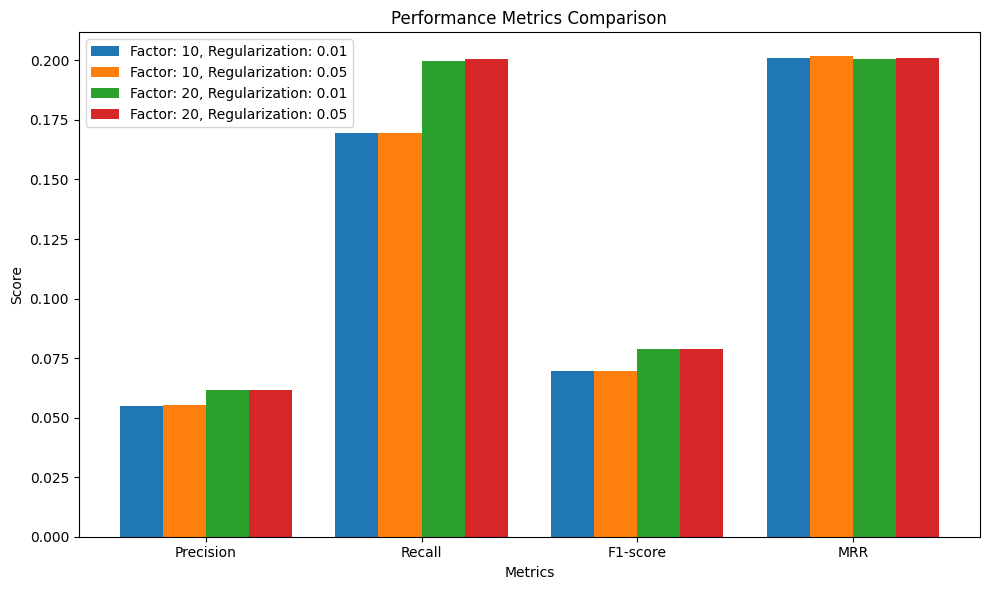

Best hyperparameter: factor: 20, regularization: 0.05
Best performance metric: 
precision: 0.0614 
recall: 0.2004
f1: 0.079
mrr: 0.2008


In [116]:
import itertools

# Grid search on the recommendation without pattern
valid_data_filtered = valid_data[valid_data['CustomerID'].isin(customer_mapping.keys())]

factor_list = [10, 20]
regularization_list = [0.01, 0.05]

best_sum = -1
best_param = None
best_metric = None

# Lists to store metrics for each combination of hyperparameters
precision_list = []
recall_list = []
f1_list = []
mrr_list = []

for factor in factor_list:
    for regularization in regularization_list:
        model = train_CF(train_data, factor, regularization)

        precision, recall, f1, mrr = test_performance(valid_data_filtered, model=model)
        sum_metric = sum((precision, recall, f1, mrr))

        # Track best model
        if best_sum < sum_metric:
            best_sum = sum_metric
            best_param = (factor, regularization)
            best_metric = (precision, recall, f1, mrr)

        # Store metrics for each combination of hyperparameters
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        mrr_list.append(mrr)

# Plot the metric comparison
width = 0.2
x = np.arange(len(factor_list) * len(regularization_list))

fig, ax = plt.subplots(figsize=(10, 6))

for i, (factor, regularization) in enumerate(itertools.product(factor_list, regularization_list)):
    ax.bar(x + (i - 1.5) * width, [precision_list[i], recall_list[i], f1_list[i], mrr_list[i]], 
           width=width, label=f'Factor: {factor}, Regularization: {regularization}')

ax.set_xticks(x)
ax.set_xticklabels(['Precision', 'Recall', 'F1-score', 'MRR'])
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics Comparison (without pattern)')
ax.legend()

plt.tight_layout()
plt.show()

print(f"Best hyperparameter: factor: {best_param[0]}, regularization: {best_param[1]}")
print(f"Best performance metric: \nprecision: {best_metric[0]} \nrecall: {best_metric[1]}\nf1: {best_metric[2]}\nmrr: {best_metric[3]}")


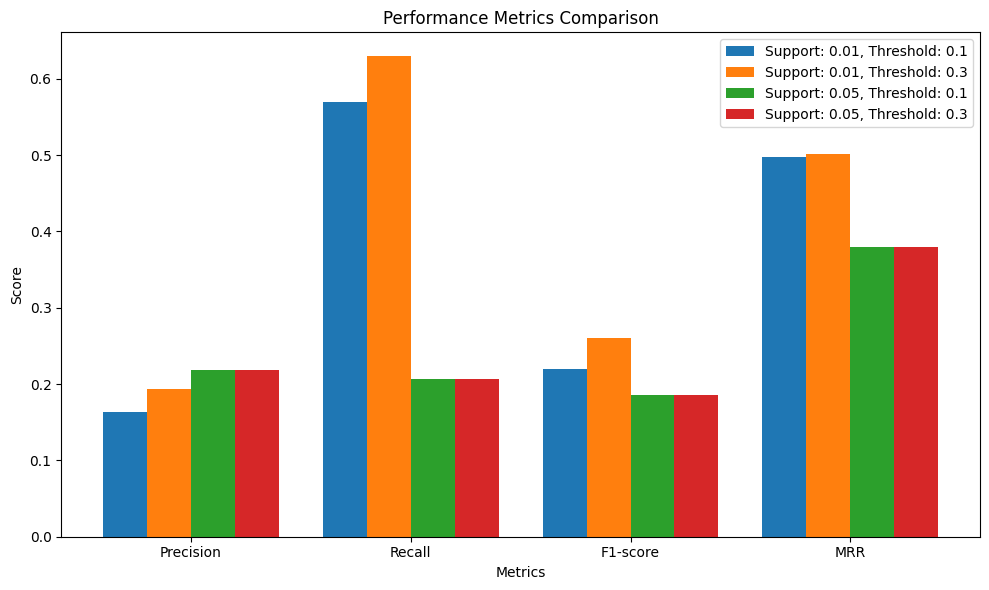

Best hyperparameter: min_support: 0.01, confidence_threshold: 0.3
Best performance metric: 
precision: 0.1932, 
recall: 0.6294
f1: 0.2607
mrr: 0.502


In [117]:
# Grid search on the recommendation with pattern
best_sum = -1
best_param = None
best_metric = None

support_list = [0.01, 0.05]
threshold_list = [0.1, 0.3]

# Lists to store metrics for each combination of hyperparameters
precision_list = []
recall_list = []
f1_list = []
mrr_list = []

for support, threshold in itertools.product(support_list, threshold_list):
    pattern = get_pattern(transactions, min_support=support)
    rules = generate_association_rules(pattern, min_threshold=threshold)

    precision, recall, f1, mrr = test_performance(valid_data_filtered, without_pattern=False, rules=rules, pattern=pattern)
    sum_metric = sum((precision, recall, f1, mrr))

    # Track best model
    if best_sum < sum_metric:
        best_sum = sum_metric
        best_param = (support, threshold)
        best_metric = (precision, recall, f1, mrr)

    # Store metrics for each combination of hyperparameters
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    mrr_list.append(mrr)

# Plot the metric comparison
width = 0.2
x = np.arange(len(support_list) * len(threshold_list))

fig, ax = plt.subplots(figsize=(10, 6))

for i, (support, threshold) in enumerate(itertools.product(support_list, threshold_list)):
    ax.bar(x + (i - 1.5) * width, [precision_list[i], recall_list[i], f1_list[i], mrr_list[i]], 
           width=width, label=f'Support: {support}, Threshold: {threshold}')

ax.set_xticks(x)
ax.set_xticklabels(['Precision', 'Recall', 'F1-score', 'MRR'])
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics Comparison (with pattern)')
ax.legend()

plt.tight_layout()
plt.show()

print(f"Best hyperparameter: min_support: {best_param[0]}, confidence_threshold: {best_param[1]}")
print(f"Best performance metric: \nprecision: {best_metric[0]}, \nrecall: {best_metric[1]}\nf1: {best_metric[2]}\nmrr: {best_metric[3]}")


## Test the final result (smaller dataset)
Here we use the best hyperparameter to train both model on the whle training set and test them on the testing set

### Test recommendation with pattern

In [89]:
# Load the test data
test_data = pd.read_csv('basket_data_by_date_test.csv').dropna()

# Filter out rows with CustomerID not found in training data
test_data_filtered = test_data[test_data['CustomerID'].isin(customer_mapping.keys())]
test_data_filtered['CustomerID'] = test_data_filtered['CustomerID'].astype(int)

In [90]:
import time

start_time = time.time()

# Use the best model hyperparameter
pattern = get_pattern(transactions, min_support=0.01)
rules = generate_association_rules(pattern, min_threshold=0.3)

precision_pt, recall_pt, f1_pt, mrr_pt = test_performance(test_data_filtered, without_pattern=False, rules=rules, pattern=pattern)

end_time = time.time()
time_with_pattern = end_time - start_time

print(f"Execution time (without pattern): {time_with_pattern:.2f} seconds")

Execution time (without pattern): 1.58 seconds


In [91]:
print("Final result on test data (with pattern):")
print(f"Precision: {precision_pt}")
print(f"Recall: {recall_pt}")
print(f"F1_score: {f1_pt}")
print(f"MRR: {mrr_pt}")

Final result on test data (with pattern):
Precision: 0.1633
Recall: 0.2311
F1_score: 0.1513
MRR: 0.3917


### Test recommendation without pattern

In [92]:
# Map CustomerID and Itemname to unique integer IDs
train_valid_data['CustomerID'] = train_valid_data['CustomerID'].map(customer_mapping)
train_valid_data['ItemID'] = train_valid_data['Itemname'].map(item_mapping)

# Convert data types to integers
train_valid_data['CustomerID'] = train_valid_data['CustomerID'].astype(int)
train_valid_data['ItemID'] = train_valid_data['ItemID'].astype(int)

In [93]:
start_time = time.time()

# Use the best model hyperparameter
model = train_CF(train_valid_data, factor=20, regularization=0.05)

precision_cf, recall_cf, f1_cf, mrr_cf = test_performance(test_data_filtered, model=model)

end_time = time.time()

time_without_pattern = end_time - start_time

print(f"Execution time (without pattern): {time_without_pattern:.2f} seconds")

100%|██████████| 50/50 [00:00<00:00, 56.75it/s]


Execution time (without pattern): 1.09 seconds


In [94]:
print("Final result on test data (without pattern):")
print(f"Precision: {precision_cf}")
print(f"Recall: {recall_cf}")
print(f"F1_score: {f1_cf}")
print(f"MRR: {mrr_cf}")

Final result on test data (without pattern):
Precision: 0.1346
Recall: 0.193
F1_score: 0.1214
MRR: 0.3279


**Train/testing methodology:**

Our project utilizes a train-validation-test split strategy to optimize and evaluate our recommendation system. This approach involves dividing the available data into three distinct sets:

- Training Set (larger portion in the train csv): This set is used to train the recommendation model. It constitutes the bulk of your data (typically around 70-80%).
- Validation Set (smaller portion in the train csv): This set is dedicated to hyperparameter tuning. Here, you experiment with different model configurations to identify the settings that yield the best performance. The validation set size is typically smaller than the training set (around 10-20%).
- Test Set: This set is unseen by the model during training and hyperparameter tuning. It serves as a benchmark for evaluating the final model's generalizability and performance on new data.

Here's a breakdown of the process:

- Train the Model on the Training Set: Use the training set to fit your chosen recommendation model.
- Hyperparameter Tuning on the Validation Set: Evaluate the model's performance with different parameter configurations on the validation set. This helps you identify the optimal hyperparameter combination that maximizes your chosen evaluation metric(s).
- Final Model Training and Testing: Train the model with the best hyperparameters identified from the validation set using the entire training data. Finally, evaluate this final model's performance on the unseen test set.

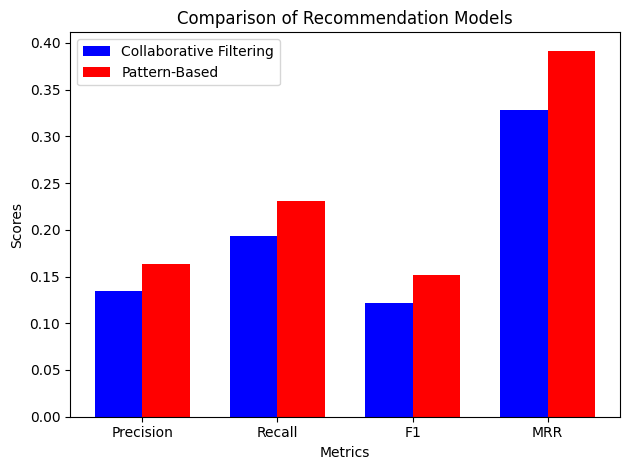

In [95]:
# Labels for the metrics
metrics = ['Precision', 'Recall', 'F1', 'MRR']

# Values for CF model
values_cf = [precision_cf, recall_cf, f1_cf, mrr_cf]

# Values for PT model
values_pt = [precision_pt, recall_pt, f1_pt, mrr_pt]

# Set the positions for the groups
positions = list(range(len(metrics)))

# Set the width of the bars
bar_width = 0.35

# Plot the grouped bar plot
plt.bar(positions, values_cf, bar_width, label='Collaborative Filtering', color='b')
plt.bar([p + bar_width for p in positions], values_pt, bar_width, label='Pattern-Based', color='r')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Recommendation Models')
plt.xticks([p + bar_width/2 for p in positions], metrics)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**Analysis: Pattern-Based Recommendations Outperform Without-Pattern Approach**

Our analysis of the recommendation system's performance using precision, recall, F1-score, and MRR reveals that the pattern-based approach (utilizing frequent itemset mining) outperforms the collaborative filtering approach (without pattern). Here's how these metrics contribute to this conclusion:
- Precision: The pattern-based model might achieve higher precision, suggesting a greater proportion of recommended items are actually relevant to the user's needs. This could be because the model leverages patterns of co-purchased items, leading to more targeted recommendations.
- Recall: The pattern-based model could have higher recall, indicating it captures a larger portion of the relevant items the user might be interested in. By considering frequent itemsets, the model might recommend items often bought together, even if they weren't purchased together in a specific transaction.
- F1-Score: A high F1-score for the pattern-based model suggests a good balance between precision and recall. This indicates the model excels at recommending both relevant and comprehensive items.
- MRR: If the pattern-based model has a higher MRR, it implies that relevant items tend to rank higher in the recommendation list. This makes it easier for users to find the items they might be interested in.

**Possible Reasons for Improved Performance:**

- Leveraging Purchase Patterns: Identifying frequently co-purchased items allows the model to make data-driven recommendations based on established customer behavior.
- Specificity: Patterns can capture specific buying habits, potentially leading to more targeted and relevant recommendations compared to a broader approach like collaborative filtering.
- Addressing Cold Start Problem: Frequent itemset mining can be helpful for new users or items with limited purchase history. By analyzing patterns, the model might still recommend relevant items even without extensive user-specific data.

### Runtime comparison

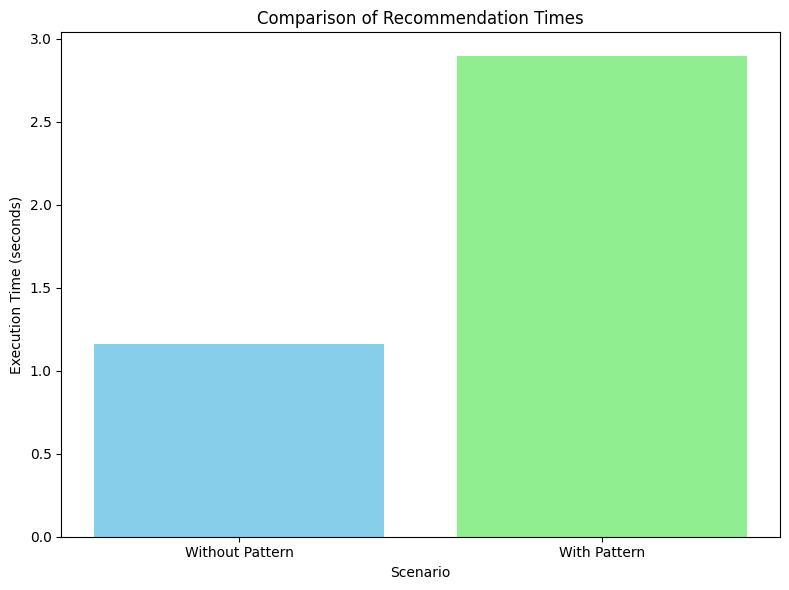

In [49]:
scenarios = ["Without Pattern", "With Pattern"]
runtimes = [time_without_pattern, time_with_pattern]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(scenarios, runtimes, color=['skyblue', 'lightgreen'])
plt.xlabel("Scenario")
plt.ylabel("Execution Time (seconds)")
plt.title("Comparison of Recommendation Times")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Display the chart
plt.tight_layout()
plt.show()

**Analyzing Runtime with and Without Frequent Itemset Mining:**

The provided graph showcases the execution time of the recommendation system with and without frequent itemset mining. As expected, we observe a faster runtime for the model without pattern discovery. This is because it bypasses the initial step of mining frequent itemsets using the FP-growth algorithm, which can be computationally expensive for larger datasets.

In contrast, the model that utilizes frequent itemsets and association rules incurs additional processing time. This includes identifying frequently co-occurring items (patterns) and generating association rules based on those patterns. While this adds some overhead, it can lead to more targeted and potentially more accurate recommendations by leveraging the discovered relationships between items.

## Final performance on large-scale data: assessing system scalability

In [96]:
# Read the training
train_valid_data = pd.read_csv('basket_data_by_date_train_big.csv').dropna()

In [97]:
# Map CustomerID and Itemname to unique integer IDs
customer_mapping = {cust_id: i for i, cust_id in enumerate(train_valid_data['CustomerID'].unique())}
item_mapping = {item_name: i for i, item_name in enumerate(train_valid_data['Itemname'].unique())}

customer_mapping_reverse = {v: k for k, v in item_mapping.items()}
item_mapping_reverse = {v: k for k, v in item_mapping.items()}

In [98]:
# Group by CustomerID and collect all Itemnames per customer into a list
transactions = train_valid_data.groupby('CustomerID')['Itemname'].apply(list).reset_index()

### Test recommendation with pattern

In [99]:
# Load the test data
test_data = pd.read_csv('basket_data_by_date_test_big.csv').dropna()

# Filter out rows with CustomerID not found in training data
test_data_filtered = test_data[test_data['CustomerID'].isin(customer_mapping.keys())]
test_data_filtered['CustomerID'] = test_data_filtered['CustomerID'].astype(int)

In [100]:
import time

start_time = time.time()

# Use the best model hyperparameter
pattern = get_pattern(transactions, min_support=0.02)
rules = generate_association_rules(pattern, min_threshold=0.4)
len(pattern)

precision_pt, recall_pt, f1_pt, mrr_pt = test_performance(test_data_filtered, without_pattern=False, rules=rules, pattern=pattern)

end_time = time.time()
time_with_pattern = end_time - start_time

print(f"Execution time (without pattern): {time_with_pattern:.2f} seconds")

Execution time (without pattern): 38.32 seconds


In [101]:
print("Final result on test data (with pattern) - bigger data:")
print(f"Precision: {precision_pt}")
print(f"Recall: {recall_pt}")
print(f"F1_score: {f1_pt}")
print(f"MRR: {mrr_pt}")

Final result on test data (with pattern) - bigger data:
Precision: 0.1767
Recall: 0.1909
F1_score: 0.146
MRR: 0.3812


### Test recommendation without pattern

In [102]:
# Map CustomerID and Itemname to unique integer IDs
train_valid_data['CustomerID'] = train_valid_data['CustomerID'].map(customer_mapping)
train_valid_data['ItemID'] = train_valid_data['Itemname'].map(item_mapping)

# Convert data types to integers
train_valid_data['CustomerID'] = train_valid_data['CustomerID'].astype(int)
train_valid_data['ItemID'] = train_valid_data['ItemID'].astype(int)

In [103]:
start_time = time.time()

# Use the best model hyperparameter
model = train_CF(train_valid_data, factor=20, regularization=0.05)

precision_cf, recall_cf, f1_cf, mrr_cf = test_performance(test_data_filtered, model=model)

end_time = time.time()

time_without_pattern = end_time - start_time

print(f"Execution time (without pattern): {time_without_pattern:.2f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 30.66it/s]


Execution time (without pattern): 2.64 seconds


In [104]:
print("Final result on test data (without pattern) - bigger data:")
print(f"Precision: {precision_cf}")
print(f"Recall: {recall_cf}")
print(f"F1_score: {f1_cf}")
print(f"MRR: {mrr_cf}")

Final result on test data (without pattern) - bigger data:
Precision: 0.1457
Recall: 0.1752
F1_score: 0.1215
MRR: 0.3905


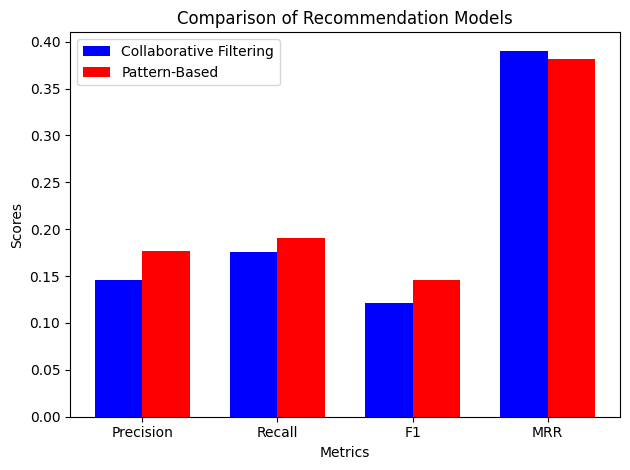

In [105]:
# Labels for the metrics
metrics = ['Precision', 'Recall', 'F1', 'MRR']

# Values for CF model
values_cf = [precision_cf, recall_cf, f1_cf, mrr_cf]

# Values for PT model
values_pt = [precision_pt, recall_pt, f1_pt, mrr_pt]

# Set the positions for the groups
positions = list(range(len(metrics)))

# Set the width of the bars
bar_width = 0.35

# Plot the grouped bar plot
plt.bar(positions, values_cf, bar_width, label='Collaborative Filtering', color='b')
plt.bar([p + bar_width for p in positions], values_pt, bar_width, label='Pattern-Based', color='r')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Recommendation Models')
plt.xticks([p + bar_width/2 for p in positions], metrics)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**Performance on Larger Dataset: Maintaining Effectiveness**

To evaluate scalability, we tested the final models on a larger dataset.  The results are encouraging: the system's performance with frequent itemset mining (pattern-based) remained generally consistent with the smaller dataset. This suggests the model can handle larger data volumes effectively while maintaining its ability to generate relevant recommendations.

Interestingly, the performance of the collaborative filtering model (without pattern) showed a slight improvement on the larger dataset. This could be attributed to the increased user-item interaction data that can benefit collaborative filtering techniques. However, despite this gain, the pattern-based recommendation system still maintained its overall advantage in terms of precision, recall, F1-score, and MRR, demonstrating its robustness and effectiveness for larger datasets.

# Reference

Mulyawan, B, Vionelsy & Sutrisno, T 2020, ‘Product recommendation system on building materials shopping using FP-Growth algorithm’, IOP Conference Series: Materials Science and Engineering, vol. 1007, p. 012144.

Mythili, MS & Shanavas, ARM 2013, ‘Performance Evaluation of Apriori and FP-Growth Algorithms’, International Journal of Computer Applications, vol. 79, no. 10, pp. 34–37.

Wayesa, F, Leranso, M, Asefa, G & Kedir, A 2023, ‘Pattern-based hybrid book recommendation system using semantic relationships’, Scientific Reports, vol. 13, no. 1.

# Appendix